# Intro to sklearn

Objectives:

- train a model with [sklearn]()
- perform a validation test

## Diabetes dataset

__Import the diabetes dataset from sklearn. Describe it.__

In [7]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data['data']
Y = data['target']

In [10]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

__Split the dataset into a training set (70%) and a test set (30%)__

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [23]:
X_train.shape

(309, 10)

In [24]:
X_test.shape

(133, 10)

In [25]:
133/(133+309)

0.3009049773755656

Features are already "centered and scaled": no need to renormalize them

__Train a linear model (with intercept) on the training set__

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# by default there is an intercept (check the doc: default value for fit_intercept is True)

In [29]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator wi

In [30]:
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
model.fit?

Signature: model.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : returns an instance of self.
File:      ~/.local/opt/miniconda/lib/python3.8/site-packages/sklearn/linear_model/_base.py
Type:      method


__Compute the fitting score on the test set. (Bonus: compare with your own computation of $R^2$)__

In [34]:
pred = model.predict(X_test)

In [35]:
Y_test

array([190., 225., 141., 281., 168.,  42., 116., 276., 281.,  51., 121.,
       156., 163., 142., 187., 173.,  39., 229., 155., 332., 257., 261.,
        42., 201., 103.,  47., 142., 172.,  71.,  96., 173., 127., 150.,
       230., 185., 209.,  37.,  92., 235., 131.,  97.,  40., 279.,  97.,
       245., 258., 102., 168.,  51., 248.,  88.,  91.,  58., 110., 308.,
        88.,  60., 311., 246., 310., 214., 200., 220., 131.,  72.,  72.,
       181.,  89., 163., 104.,  96.,  70., 217.,  55., 317., 259.,  50.,
       118., 200.,  25., 124., 129., 179., 109.,  71., 102., 252., 189.,
       190., 263., 174., 259., 111.,  85., 145.,  85., 252., 258., 274.,
        83., 140., 196., 219., 200., 197.,  51.,  66.,  79., 275.,  78.,
       257., 180., 202.,  71., 122., 136., 270.,  70., 146., 281., 114.,
        59., 191.,  91.,  65., 143., 185., 243.,  53.,  99., 125., 139.,
       292.])

In [36]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Out of sample test')

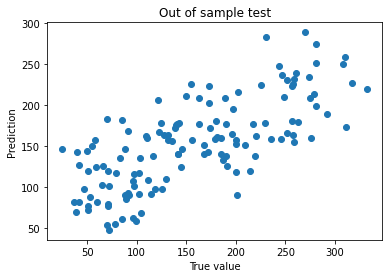

In [41]:
plt.plot(Y_test, pred,'o')
plt.xlabel("True value")
plt.ylabel("Prediction")
plt.title("Out of sample test")

In [42]:
model.score(X_test, Y_test)

0.5249868646449161

In [43]:
model.score?

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination :math:`R^2` of the
prediction.

The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
where :math:`u` is the residual sum of squares ``((y_true - y_pred)
** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of `y`,
disregarding the input features, would get a :math:`R^2` score of
0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_output

__Should we adjust the size of the test set? What would be the problem?__

In [46]:
for values in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=values)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    score = model.score(X_test, Y_test)
    
    print(f"Test Set {values:.2f}% | Score: {score:.3f}")

Test Set 0.05% | Score: 0.427
Test Set 0.10% | Score: 0.537
Test Set 0.20% | Score: 0.558
Test Set 0.30% | Score: 0.451
Test Set 0.40% | Score: 0.513
Test Set 0.50% | Score: 0.475
Test Set 0.60% | Score: 0.488
Test Set 0.70% | Score: 0.439


There is a tradeoff between:
- a big test set: score more accurate, but the fitting is less accurate (more bias)
- a small test set: score more volatile, but the fitting is more accurate (more variance)

__Implement $k$-fold model with $k=3$.__

In [54]:
scores = []

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print(X_train.shape)

    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    score = model.score(X_test, Y_test)
    
    scores.append(score)
    
   ## train a model in X_train, y_train
   ## test it on X_test, y_test

(294, 10)
(295, 10)
(295, 10)


In [55]:
scores

[0.4693057771290108, 0.48724993937707484, 0.5095525852352711]

In [58]:
sum(scores)/3

0.4887027672471189

__Bonus: use `statsmodels` (or `linearmodels`) to estimate the same linear model on the full sample. Is it always a superior method?__

In [63]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [66]:
import pandas
df = pandas.DataFrame(X, columns=data['feature_names'])
df['target'] = data['target']

In [67]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [68]:
from statsmodels.formula import api

In [71]:
ols_model = api.ols('target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', df)

In [73]:
result = ols_model.fit()

In [74]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        11:59:29   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sparse regressions on the Boston House Price Dataset


__Import the Boston House Price Dataset from sklearn. Describe it. Compute correlations.__

__Split the dataset into a training set (70%) and a test set (30%).__

__Train a lasso model to predict house prices. Compute the score on the test set.__

__Train a ridge model to predict house prices. Which one is better?__

__(bonus) Use statsmodels to build a model predicting house prices. What is the problem?__

## Predicting Breast Cancer

Sklearn includes the Winsconsin breast cancer database. It associates medical outcomes for tumor observation, with several characteristics. Can a machine learn how to predict whether a cancer is benign or malignant ?

__Import the Breast Cancer Dataset from sklearn. Describe it.__

__Properly train a linear logistic regression to predict cancer morbidity. (bonus: use k-fold validation)__

__Try with other classifiers. Which one is best?__